In [15]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import matplotlib.pyplot as plt

In [22]:
#train_data='''Congress President Rahul Gandhi Friday slammed Prime Minister Narendra Modi alleging he ran his government for 15 of his friends and he wondered why no big-ticket defaulters of bank loans like Vijay Mallya were not in jail. The Congress chief said the ones like Nirav Modi and Vijay Mallya, after taking bank loans, failed to return it and ran away from the country. "Not even a single one is in jail," he added. Gandhi said when his party is voted to power, no farmer "is going to be put in jail for not paying back his bank loan, it is not fair that the richest people do not go to jail but farmers go to jail for the same offence". He alleged the Prime Minister gave Rs 35,0000 crore to Nirav Modi, Rs 35,000 crore to Mehul Choksi and Rs 10,000 crore to Vijay Mallya. During the last five years, Modi ran a government for 15 people and you know the names, he said. "These are Anil Ambani, Mehul Choksi, Nirav Modi and they are Modi's friends," he said addressing a poll rally here. Focusing on his party's Minimum Income Support Scheme 'Nyay,' he said it would give purchasing power to the people and that in turn would propel factories in Tamil Nadu and the overall economy. Textile and silk hubs of Tamil Nadu, Tirupur and Kancheepuram "will become live," again and provide employment opportunities to youngsters, he said. Gandhi said his party and its allies will never allow Tamil Nadu people to be ruled by Nagpur (the RSS) and expressed confidence that DMK chief M K Stalin will soon be the Chief Minister of the State."'''
#train_data='''El mundo conoció este miércoles un poco mejor cómo es un agujero negro, uno de los objetos más misteriosos y sugerentes del Universo. Este logro, también ha puesto sobre la mesa el talento femenino en la ciencia. Y es que detrás de la histórica imagen, hay una mujer. Aunque fue un logro que se consiguió en equipo, la líder del proyecto fue una joven de 29 años, según informa el Laboratorio de Ciencias de la Computación e Inteligencia Artificial del Instituto Tecnológico de Massachusetts (MIT). Fue la informática Katie Bouman, estudiante graduada del MIT, la persona que lideró la creación de un nuevo algoritmo que hizo posible captar la histórica fotografía. La joven no pudo contener la emoción y compartió ese momento en sus redes sociales. La imagen muestra un halo de polvo y gas que se encuentra a 53,3 millones de años luz de la Tierra, en el centro de la galaxia M87. “Estoy tan emocionada de que finalmente podamos compartir lo que hemos estado trabajando durante el año pasado”, ha dicho la científica en un mensaje en Facebook para agradecer a todo el equipo de científicos de todo el mundo. Bouman comenzó a desarrollar el algoritmo hace tres años, cuando era estudiante de posgrado en el MIT.'''
train_data='''Die bis zum Tag der Verhaftung unter Verschluss gehaltene Anklageschrift der USA gegen WikiLeaks-Gründer Julian Assange ist vom Umfang her begrenzt. Assange wird lediglich der Verschwörung angeklagt. Der Vorwurf lautet, er habe mit Komplizen versucht, Zugang zu einem Regierungscomputer zu bekommen, der geheime Dokumente enthielt. Die Anklage - hier nun abrufbar - beschuldigt Assange aber nicht, geheime Informationen veröffentlicht zu haben. Hätten die USA stattdessen eine Anklage wegen Spionage erhoben, wäre dies vermutlich als direkter Angriff auf die Pressefreiheit gewertet worden, die im ersten Zusatzartikel der US-amerikanischen Verfassung verankert ist. "Dieser unterscheidet das illegale Beschaffen von Informationen vom Veröffentlichen dieser Informationen", sagt Frederick Schauer, Rechtsprofessor an der Universität Virginia. Im Gegensatz zu vielen anderen Ländern ist es in den USA nicht nur erlaubt, sondern sogar durch die Verfassung geschützt, auch auf illegale Weise erlangte Informationen zu veröffentlichen, wie Schauer erklärt. Nur der reine Akt, diese Informationen beispielsweise durch Diebstahl oder Hacken zu beschaffen, ist verboten. In der Anklage behauptet die US-Regierung, Assange habe im Jahr 2010 der Whistleblowerin Chelsea Manning geholfen, ein Passwort zu knacken, das auf Computern des Verteidigungsministeriums gespeichert ist. Diese PCs seien mit einem Regierungsnetzwerk verbunden, das für geheime Akten und Kommunikation genutzt werde. Manning hatte durch ihre damalige Tätigkeit bereits Zugriff auf die Rechner.'''
train_data=train_data.replace('!','.')
train_data=train_data.replace('?','.')





In [23]:
train_data_lower=train_data.lower()
split_data=train_data_lower.split('.')
tokens=word_tokenize(train_data_lower)
print("language")
language=input("english,hungarian,norwegian,swedish,arabic,finnish,indonesian,portuguese,turkish,azerbaijani,french,italian,romanian,danish,german,kazakh,russian,dutch,greek,nepali,spanish ")
stopWords=stopwords.words(language)+list(string.punctuation)
#+['The','the',"A","a","\'"]
special_chars=[',','.','/','"','?','!',';',',',',',"'",'"',"''","``"]
count_vect=CountVectorizer(input=tokens,lowercase=True,stop_words=language,min_df=2)
for token in word_tokenize(train_data_lower):
    if token in stopWords:
        tokens.remove(token)
for token in tokens:
    if token in special_chars:
        tokens.remove(token)

tot_length=int(tokens.count(max(tokens,key=tokens.count)))
weight={}
weight_sent={}


###remove redundant tokens
def red_tokens(tokens):
    tokens=list(set(tokens))
        
###calculation of the weights
def calc_weights(tokens):
    for token in tokens:
        weight[token]=tokens.count(token)/tot_length

language
english,hungarian,norwegian,swedish,arabic,finnish,indonesian,portuguese,turkish,azerbaijani,french,italian,romanian,danish,german,kazakh,russian,dutch,greek,nepali,spanish german


In [26]:
red_tokens(tokens)
calc_weights(tokens)
query_weight=max(weight.values())+10
query=input("query(comma seperated, NA if none) ")
query_=[]
print(query)
if query != "NA":
    print("inside")
    query_=query.split(",")
    for i in query_:
        weight[i]=query_weight
else:
    pass
print(weight)

query(comma seperated, NA if none) NA
NA
{'tag': 0.2, 'verhaftung': 0.2, 'verschluss': 0.2, 'gehaltene': 0.2, 'anklageschrift': 0.2, 'usa': 0.6, 'wikileaks-gründer': 0.2, 'julian': 0.2, 'assange': 0.8, 'umfang': 0.2, 'her': 0.2, 'begrenzt': 0.2, 'lediglich': 0.2, 'verschwörung': 0.2, 'angeklagt': 0.2, 'vorwurf': 0.2, 'lautet': 0.2, 'komplizen': 0.2, 'versucht': 0.2, 'zugang': 0.2, 'regierungscomputer': 0.2, 'bekommen': 0.2, 'geheime': 0.6, 'dokumente': 0.2, 'enthielt': 0.2, 'anklage': 0.6, 'abrufbar': 0.2, 'beschuldigt': 0.2, 'informationen': 1.0, 'veröffentlicht': 0.2, 'hätten': 0.2, 'stattdessen': 0.2, 'wegen': 0.2, 'spionage': 0.2, 'erhoben': 0.2, 'wäre': 0.2, 'vermutlich': 0.2, 'direkter': 0.2, 'angriff': 0.2, 'pressefreiheit': 0.2, 'gewertet': 0.2, 'worden': 0.2, 'ersten': 0.2, 'zusatzartikel': 0.2, 'us-amerikanischen': 0.2, 'verfassung': 0.4, 'verankert': 0.2, 'unterscheidet': 0.2, 'illegale': 0.4, 'beschaffen': 0.4, 'veröffentlichen': 0.4, 'sagt': 0.2, 'frederick': 0.2, 'schauer

In [27]:
count=0
for sent in split_data:
    count=0
    split=sent.split(' ')
    for word in split:
        if word in tokens:
            count=count+weight[word]
    weight_sent[sent]=count
print(weight_sent)

{'die bis zum tag der verhaftung unter verschluss gehaltene anklageschrift der usa gegen wikileaks-gründer julian assange ist vom umfang her begrenzt': 3.4000000000000004, ' assange wird lediglich der verschwörung angeklagt': 1.4, ' der vorwurf lautet, er habe mit komplizen versucht, zugang zu einem regierungscomputer zu bekommen, der geheime dokumente enthielt': 1.7999999999999998, ' die anklage - hier nun abrufbar - beschuldigt assange aber nicht, geheime informationen veröffentlicht zu haben': 3.6, ' hätten die usa stattdessen eine anklage wegen spionage erhoben, wäre dies vermutlich als direkter angriff auf die pressefreiheit gewertet worden, die im ersten zusatzartikel der us-amerikanischen verfassung verankert ist': 4.400000000000002, ' "dieser unterscheidet das illegale beschaffen von informationen vom veröffentlichen dieser informationen", sagt frederick schauer, rechtsprofessor an der universität virginia': 3.400000000000001, ' im gegensatz zu vielen anderen ländern ist es in 

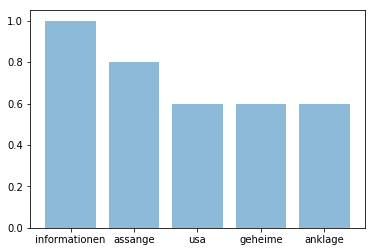

In [28]:
y_pos = np.arange(len(weight))
performance=list(weight.values())

weight_=sorted(weight,key=weight.get,reverse=True)
weight_=weight_[0:5]
weight_val=[]
for i in weight_:
    weight_val.append(weight[i])

plt.bar(weight_, weight_val, align='center', alpha=0.5)
plt.show()

In [29]:
threshold=3
selected=sorted(list(weight_sent.values()),reverse=True)[0:threshold]
for sent,weight in weight_sent.items():
    if weight in selected:
        print(sent,". ")


 hätten die usa stattdessen eine anklage wegen spionage erhoben, wäre dies vermutlich als direkter angriff auf die pressefreiheit gewertet worden, die im ersten zusatzartikel der us-amerikanischen verfassung verankert ist . 
 im gegensatz zu vielen anderen ländern ist es in den usa nicht nur erlaubt, sondern sogar durch die verfassung geschützt, auch auf illegale weise erlangte informationen zu veröffentlichen, wie schauer erklärt . 
 in der anklage behauptet die us-regierung, assange habe im jahr 2010 der whistleblowerin chelsea manning geholfen, ein passwort zu knacken, das auf computern des verteidigungsministeriums gespeichert ist . 
